In [3]:
import keras
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.models import Model
import numpy as np
#pca和auto encoder原理网址
#https://blog.csdn.net/luoluonuoyasuolong/article/details/90711318


11493376/11490434 [==============================] - 50s 4us/step
(60000, 784) (10000, 784)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 784)               392784    
Total params: 785,284
Trainable params: 785,284
Non-trainable params: 0
_________________________________________________________________


C:\Users\11029\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.1450 - val_loss: 0.2176
Epoch 2/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0932 - val_loss: 0.1940
Epoch 3/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0878 - val_loss: 0.1683
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0855 - val_loss: 0.1472
Epoch 5/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0841 - val_loss: 0.1212
Epoch 6/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0832 - val_loss: 0.1035
Epoch 7/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0825 - val_loss: 0.0934
Epoch 8/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0820 - val_loss: 0.0833
Epoch 9/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0816 - val_loss: 0.0799
Epoch

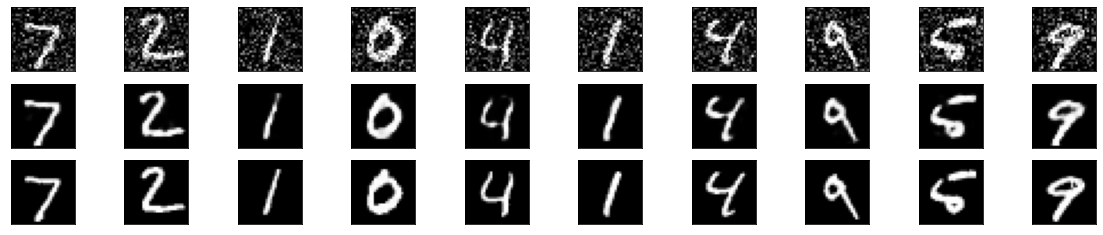

In [4]:
#step 1 数据预处理
#这里需要说明一下，导入的原始数据shape为(60000,28,28),autoencoder使用(60000,28*28)，
#而且autoencoder属于无监督学习，所以只需要导入x_train和x_test.
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
#print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
#print(x_train.shape)


#step 2 向图片添加噪声
#添加噪声是为了让autoencoder更robust，不容易出现过拟合。
#add random noise
x_train_nosiy = x_train + 0.3 * np.random.normal(loc=0., scale=1., size=x_train.shape)
x_test_nosiy = x_test + 0.3 * np.random.normal(loc=0, scale=1, size=x_test.shape)
x_train_nosiy = np.clip(x_train_nosiy, 0., 1.)
x_test_nosiy = np.clip(x_test_nosiy, 0, 1.)
print(x_train_nosiy.shape, x_test_nosiy.shape)


#step 3 搭建网络结构
#分别构建encoded和decoded,然后将它们链接起来构成整个autoencoder。使用Model建模。
#build autoencoder model
input_img = Input(shape=(28*28,))
encoded = Dense(500, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input=input_img, output=decoded)

#step 4 compile
#因为这里是让解压后的图片和原图片做比较， loss使用的是binary_crossentropy。

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

#step 5 train
#指定epochs，batch_size，可以使用validation_data,keras训练的时候不会使用它，而是用来做模型评价
autoencoder.fit(x_train_nosiy, x_train, epochs=20, batch_size=128, verbose=1, validation_data=(x_test, x_test))

#step 6 对比一下解压缩后的图片和原图片
%matplotlib inline
import matplotlib.pyplot as plt

#decoded test images
decoded_img = autoencoder.predict(x_test_nosiy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    #noisy data
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test_nosiy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #predict
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    #original
    ax = plt.subplot(3, n, i+1+2*n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.show()